In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv(r'E:\Placement predictor dataset\placementdata.csv')
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [16]:
print("Extracurricular Activities Distribution:")
print(data['ExtracurricularActivities'].value_counts())

print("\nPlacement Training Distribution:")
print(data['PlacementTraining'].value_counts())

print("\nPlacement Status Distirbution:")
print(data['PlacementStatus'].value_counts())

Extracurricular Activities Distribution:
ExtracurricularActivities
Yes    5854
No     4146
Name: count, dtype: int64

Placement Training Distribution:
PlacementTraining
Yes    7318
No     2682
Name: count, dtype: int64

Placement Status Distirbution:
PlacementStatus
NotPlaced    5803
Placed       4197
Name: count, dtype: int64


In [17]:
numerical_cols = data.select_dtypes(include = ['int64','float64']).columns
categorical_cols = data.select_dtypes(include = ['object']).columns

print(f"Numerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'SSC_Marks', 'HSC_Marks'],
      dtype='object')
Categorical columns: Index(['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus'], dtype='object')


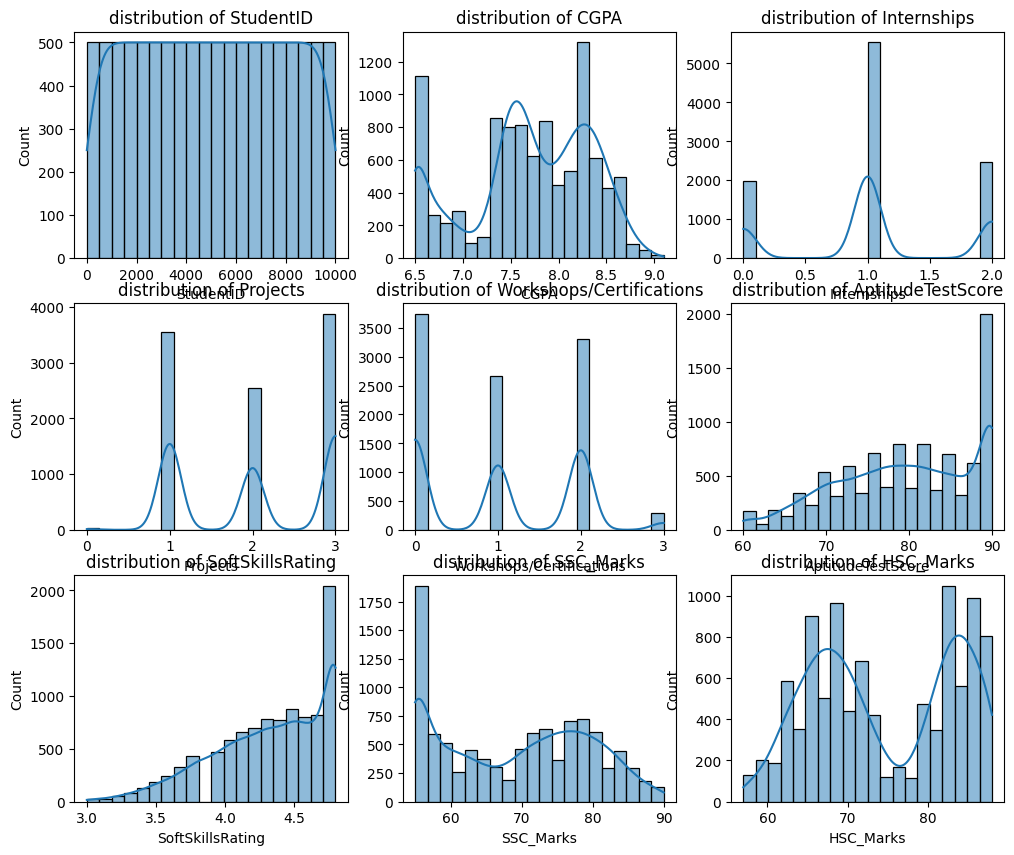

In [18]:
plt.figure(figsize=(12, 10))
for i, col in enumerate (numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde = True, bins = 20)
    plt.title(f"distribution of {col}")

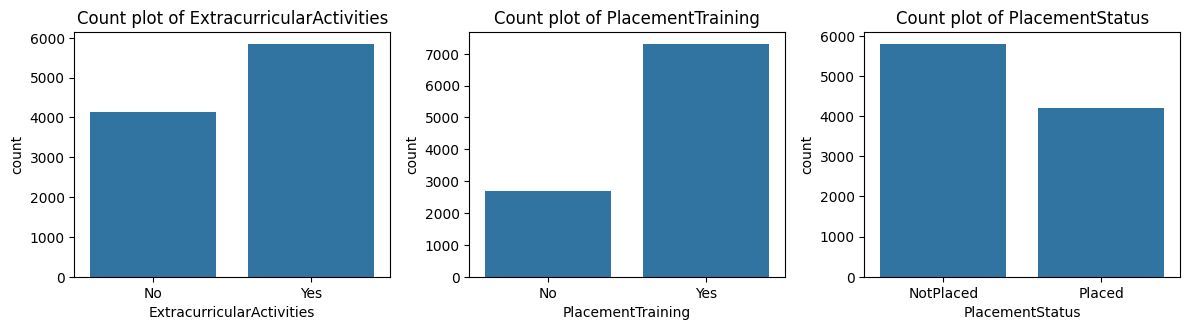

In [19]:
plt.figure(figsize=(12,6))
for i , col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x = data[col])
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

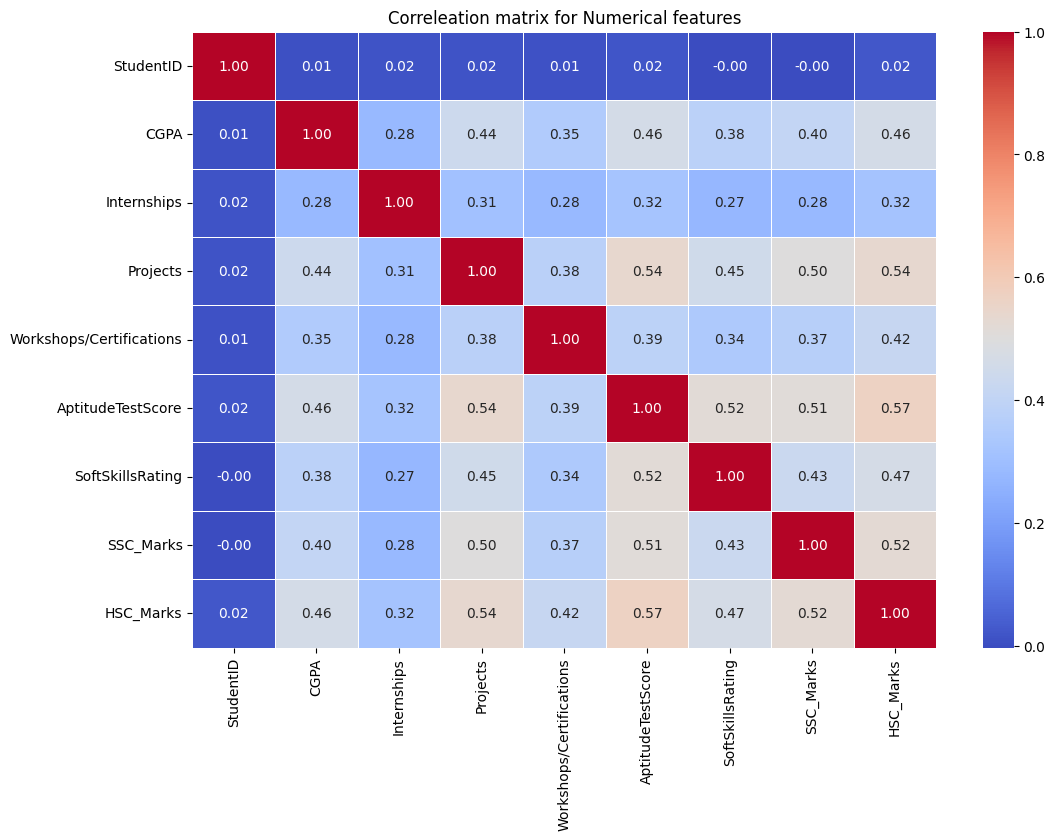

In [20]:
# correleation heatmap
corr_matrix = data[numerical_cols].corr()

plt.figure(figsize = (12,8))
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', fmt  = '.2f', linewidths = 0.5)
plt.title("Correleation matrix for Numerical features")
plt.show()

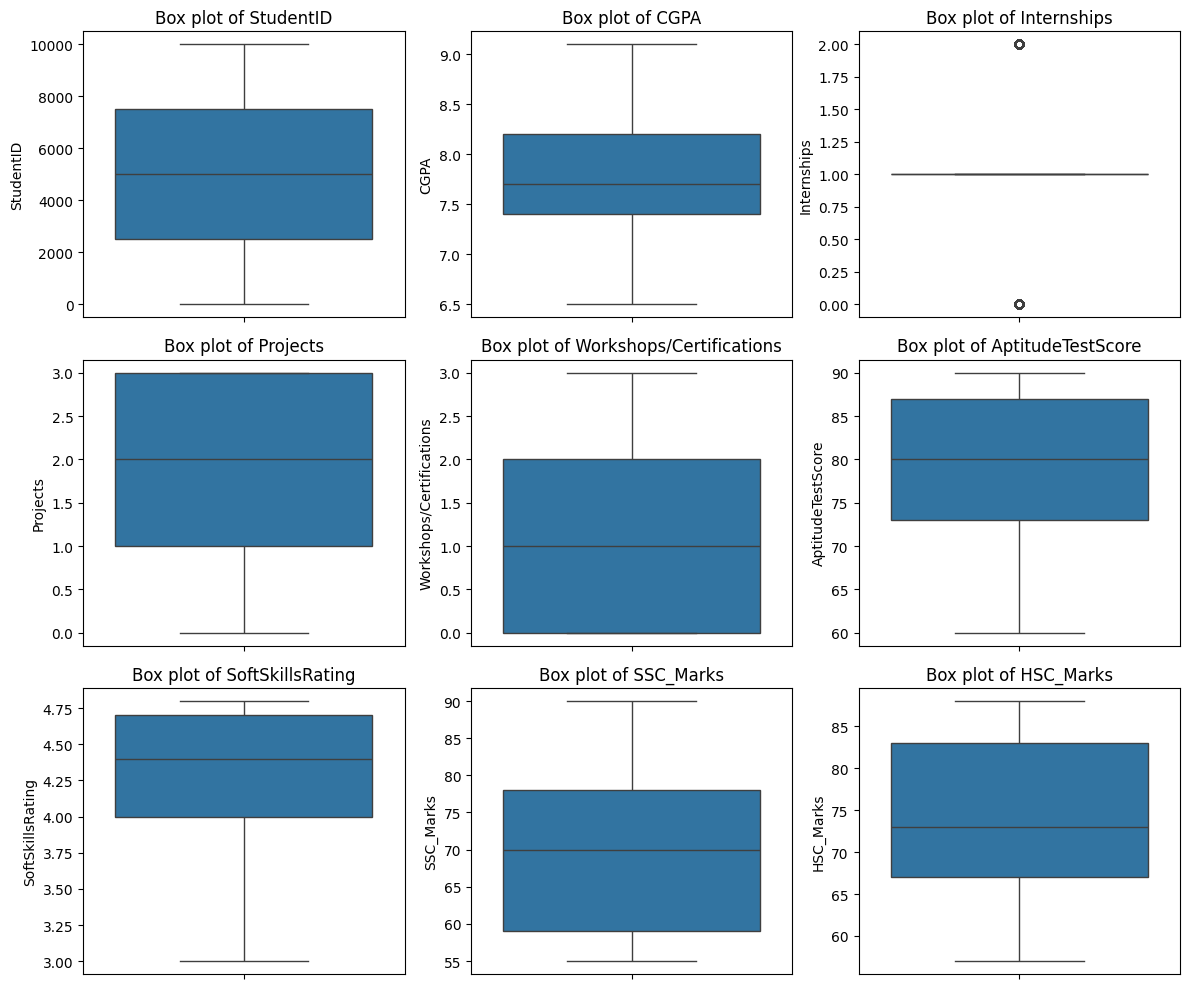

In [22]:
plt.figure(figsize=(12,10))
for i, col in enumerate(numerical_cols,1):
    plt.subplot(3, 3, i)
    sns.boxplot(data = data[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.show()

In [23]:
Q1 =  data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_cols] < Q1 - 1.5 * IQR) | (data[numerical_cols] > Q3 + 1.5 * IQR))
outliers_count = outliers.sum()
print("\nOutliers count per numerical columns:")
print(outliers_count)


Outliers count per numerical columns:
StudentID                      0
CGPA                           0
Internships                 4458
Projects                       0
Workshops/Certifications       0
AptitudeTestScore              0
SoftSkillsRating               0
SSC_Marks                      0
HSC_Marks                      0
dtype: int64


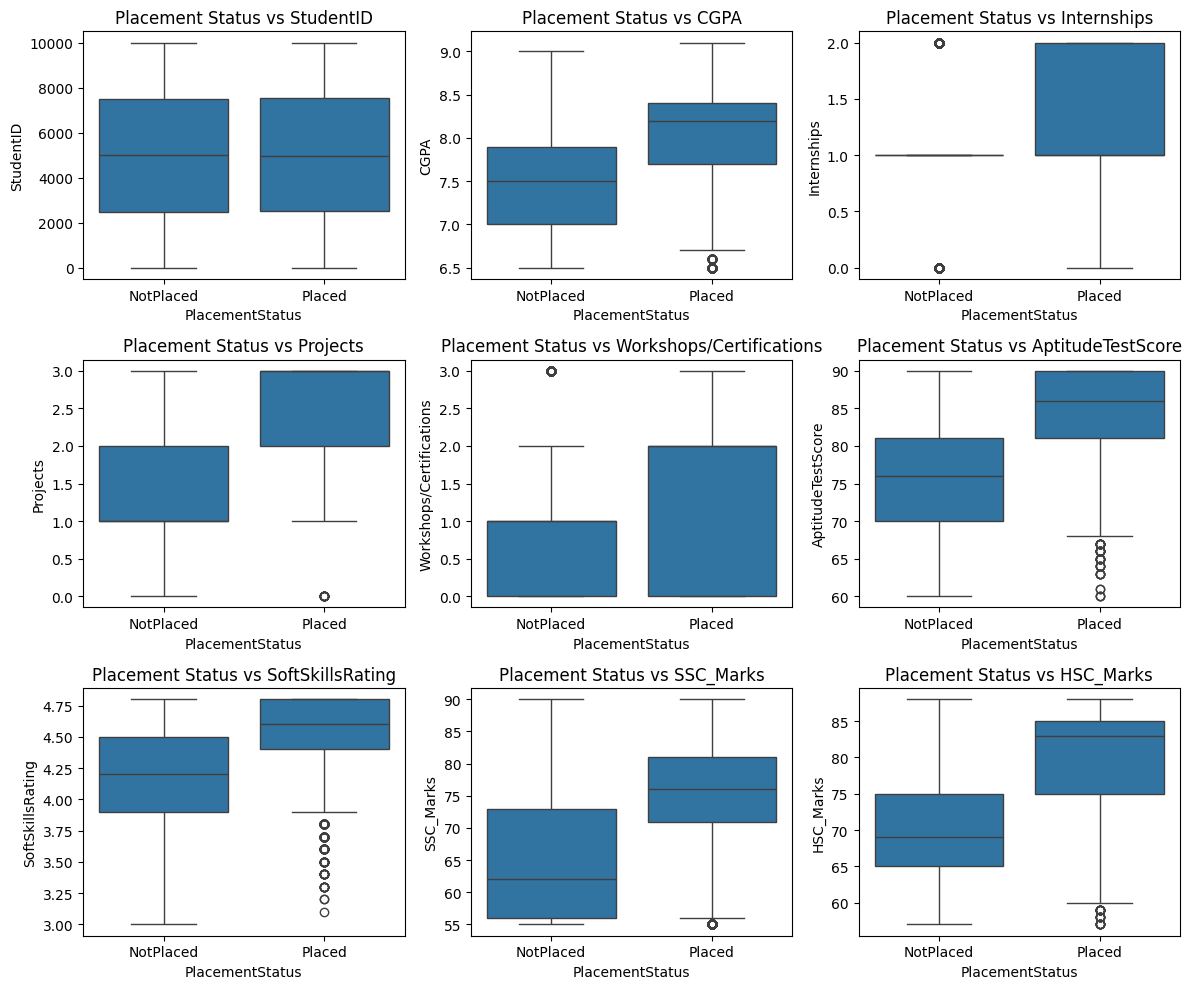

In [24]:
plt.figure(figsize=(12,10))

for i , col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x = data["PlacementStatus"], y = data[col])
    plt.title(f"Placement Status vs {col}")

plt.tight_layout()
plt.show()